In [33]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os

from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

In [3]:
!pwd

/c/Users/onkar/Downloads/take home challenges/featurelabs/brazil_ecomm/code


In [15]:
data_dir = '../data/'
filenames = os.listdir(data_dir)
for i, ele in enumerate(filenames):
    print(i, ele)

0 olist_customers_dataset.csv
1 olist_geolocation_dataset.csv
2 olist_orders_dataset.csv
3 olist_order_items_dataset.csv
4 olist_order_payments_dataset.csv
5 olist_order_reviews_dataset.csv
6 olist_products_dataset.csv
7 olist_sellers_dataset.csv
8 product_category_name_translation.csv


In [11]:
Image(url= "https://i.imgur.com/HRhd2Y0.png")

## Unique customer, order count

In [19]:
df_orders.shape[0], df_orders['customer_id'].nunique(), df_orders['order_id'].nunique()

(99441, 99441, 99441)

### Note: no repeating orders for same cutomers

## Difference beween customer_id and customer_unique_id

In [26]:
df_cust['customer_id'].nunique(),df_cust['customer_unique_id'].nunique()

(99441, 96096)

### can be interpreted as same person, different email id.

In [ ]:
## 1) predict order value  (interpretable model)
## 2) clustering wrt customers (try to map with geolocation see if there is any correlation), 
## orders ...( get ones that are reviewed vs not), sellers, products

In [27]:
df_payments = pd.read_csv(data_dir+filenames[4])

In [28]:
df_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


## Distribution of payment value

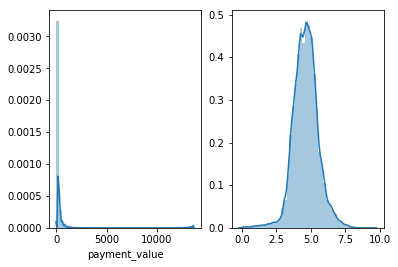

In [53]:
plt.figure(figsize=(10,8))
f, (ax1, ax2) = plt.subplots(1, 2)
sns.distplot(df_payments['payment_value'], ax=ax1)
sns.distplot(np.log(df_payments['payment_value']+1).values, ax=ax2)  ## 9 ordervalues are 0
plt.show()

In [ ]:
# payment_sequentiala customer may pay an order with more than one payment method. If he does so,
# a sequence will be created to accommodate all payments.

# Need to do the right transformations, to calculate payments at order level